In [1]:
import requests
import numpy as np
import pandas as pd
import datetime

Lista das estações automáticas:

In [2]:
# Buscando via API - INMET
aut_List = requests.get('https://apitempo.inmet.gov.br/estacoes/T')

In [3]:
# Listando os dados coletados:

# Lista de dicionários informativos de cada estação
dicts_list = []

# Lista dos nomes das estações
est_names = []

# Lista dos códigos das estações
est_codes = []

for estacao in aut_List.json():
    estDict = dict(estacao)
    est_names.append(estDict['DC_NOME'])
    est_codes.append(estDict['CD_ESTACAO'])
    dicts_list.append(estDict)


Série de 14 dias:

In [4]:
# Buscando os 14 dias (2021-09-16 até 2021-09-30)
# Como a API exige o código da estação, será feita uma iteração com a lista obtida anteriormente (est_codes) 
list14_days = []
dict_14days = {}
for code in est_codes:
    data14 = requests.get('https://apitempo.inmet.gov.br/estacao/diaria/2021-09-16/2021-09-30/'+code)
    dict_14days.update({code:data14.json()})
    list14_days.append(data14.json())

In [11]:
dict_14days.keys()

dict_keys(['A422', 'A360', 'A657', 'A908', 'A756', 'A045', 'A549', 'A534', 'A617', 'A826', 'A615', 'A053', 'A508', 'A924', 'A253', 'A909', 'A024', 'A223', 'A934', 'A336', 'A750', 'A434', 'S701', 'A377', 'A628', 'A910', 'A340', 'A113', 'A719', 'A409', 'A566', 'A013', 'A054', 'A021', 'A044', 'S702', 'A353', 'A867', 'A505', 'A309', 'A310', 'A940', 'A736', 'A606', 'A120', 'A725', 'A220', 'A827', 'A375', 'S113', 'A204', 'A565', 'S703', 'A502', 'A315', 'A128', 'A429', 'A741', 'A221', 'A746', 'A402', 'A748', 'A755', 'A759', 'A705', 'A764', 'A757', 'A201', 'A447', 'F501', 'A840', 'A765', 'A135', 'A110', 'A845', 'A418', 'A326', 'S122', 'S704', 'A226', 'A744', 'S705', 'A001', 'A927', 'A042', 'A421', 'A228', 'A433', 'A238', 'A432', 'A544', 'S706', 'A348', 'A329', 'A859', 'A812', 'A769', 'A939', 'A023', 'A316', 'A344', 'A530', 'S707', 'A838', 'A352', 'A897', 'A604', 'A236', 'B803', 'A313', 'A519', 'A884', 'A702', 'A376', 'A905', 'A912', 'A706', 'A607', 'A620', 'A043', 'A898', 'A347', 'A879', 'A811

In [12]:
# listando os códigos das estações que tenham pelo menos o primeiro dia com dado de temperatura mínima
validas = []
for chave in dict_14days.keys():
    if pd.DataFrame(dict_14days[chave])['TEMP_MIN'].isnull()[0] == False:
        validas.append(chave)


In [13]:
validas

['A756',
 'A045',
 'A549',
 'A826',
 'A615',
 'A053',
 'A508',
 'A909',
 'A024',
 'A934',
 'A336',
 'A434',
 'S701',
 'A409',
 'A566',
 'A054',
 'S702',
 'A867',
 'A505',
 'A310',
 'A606',
 'A220',
 'A375',
 'S113',
 'A502',
 'A402',
 'A755',
 'A705',
 'A201',
 'F501',
 'A840',
 'A845',
 'A326',
 'A744',
 'A001',
 'A042',
 'A433',
 'A329',
 'A859',
 'A530',
 'A897',
 'A604',
 'A313',
 'A884',
 'A702',
 'A912',
 'A706',
 'A607',
 'A898',
 'A879',
 'A811',
 'A365',
 'A887',
 'A248',
 'A337',
 'A554',
 'A629',
 'A742',
 'A034',
 'A548',
 'A876',
 'B806',
 'A520',
 'A557',
 'A374',
 'A416',
 'A724',
 'A760',
 'A720',
 'A342',
 'A036',
 'A056',
 'A853',
 'A901',
 'A448',
 'A807',
 'A860',
 'A537',
 'A038',
 'A848',
 'A564',
 'A252',
 'S107',
 'A536',
 'A603',
 'A029',
 'A893',
 'A442',
 'A351',
 'A535',
 'A311',
 'A806',
 'A524',
 'A039',
 'A452',
 'A305',
 'A708',
 'A046',
 'A875',
 'A364',
 'A022',
 'A002',
 'A014',
 'A533',
 'A019',
 'A349',
 'A555',
 'A319',
 'A410',
 'A225',
 'A823',
 

In [28]:
def df_transform(dictionary):
    df = pd.DataFrame(dictionary)
    df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'])
    return df
    
a756 = df_transform(dict_14days['A756'])
a045 = df_transform(dict_14days['A045'])


In [15]:
# criação do DataFrame
df_names = pd.DataFrame({'Name':[],'Code':[]}) 
for cada in dicts_list:
    df_names = df_names.append({'Name':cada['DC_NOME'], 'Code':cada['CD_ESTACAO']}, ignore_index=True)

In [16]:
df_names

,Name,Code
0,ABROLHOS,A422
1,ACARAU,A360
2,AFONSO CLAUDIO,A657
3,AGUA BOA,A908
4,AGUA CLARA,A756
...,...,...
600,VITORIA DA CONQUISTA,A414
601,VOTUPORANGA,A729
602,XANXERE,A858
603,XINGUARA,A247


Plot

In [19]:
import matplotlib.pyplot as plt

In [20]:
a045

,UMID_MED,DT_MEDICAO,DC_NOME,UMID_MIN,TEMP_MED,CHUVA,VL_LATITUDE,TEMP_MIN,TEMP_MAX,UF,VEL_VENTO_MED,CD_ESTACAO,VL_LONGITUDE
0,28.8,2021-09-16,AGUAS EMENDADAS,13,25.1,0,-15.596491,15.4,34.1,DF,2.7,A045,-47.625801
1,30.2,2021-09-17,AGUAS EMENDADAS,16,23.6,0,-15.596491,18.8,30.5,DF,3.1,A045,-47.625801
2,35.2,2021-09-18,AGUAS EMENDADAS,12,22.3,0,-15.596491,13.8,32.1,DF,2.3,A045,-47.625801
3,23.9,2021-09-19,AGUAS EMENDADAS,10,24.2,0,-15.596491,10.4,34.3,DF,2.5,A045,-47.625801
4,33.9,2021-09-20,AGUAS EMENDADAS,14,24.7,0,-15.596491,11.5,34.7,DF,2.1,A045,-47.625801
5,36.1,2021-09-21,AGUAS EMENDADAS,12,25.7,0,-15.596491,14,37.1,DF,1.6,A045,-47.625801
6,40.3,2021-09-22,AGUAS EMENDADAS,13,25.3,0,-15.596491,14.7,36.8,DF,1.7,A045,-47.625801
7,48.9,2021-09-23,AGUAS EMENDADAS,29,25.2,0,-15.596491,18,32.9,DF,2.8,A045,-47.625801
8,50.1,2021-09-24,AGUAS EMENDADAS,19,25.3,0,-15.596491,17.2,34.3,DF,2,A045,-47.625801
9,61.6,2021-09-25,AGUAS EMENDADAS,30,22.4,0,-15.596491,19.3,30,DF,1.4,A045,-47.625801


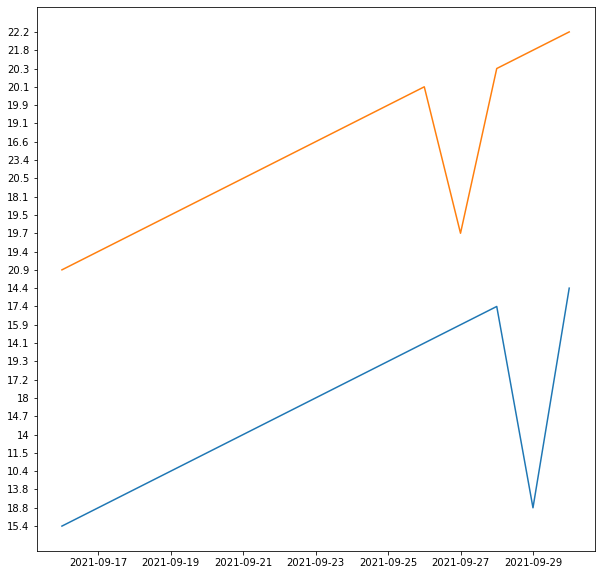

In [30]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.plot(a045['DT_MEDICAO'], a045['TEMP_MIN'])
ax.plot(a756['DT_MEDICAO'], a756['TEMP_MIN'])